In [66]:

import pandas as pd

# Function to load and parse the training data
def load_train_data(filepath):
    data = []
    with open(filepath, 'r', encoding='utf-8') as file:  # Specify the encoding here
        for line in file:
            # Split each line by ":::" and strip any leading/trailing whitespace
            parts = [part.strip() for part in line.split(':::')]
            data.append(parts)
    
    # Create a DataFrame
    df_train = pd.DataFrame(data, columns=['ID', 'Title', 'Genre', 'Description'])
    return df_train

# Function to load and parse the test data
def load_test_data(filepath):
    data = []
    with open(filepath, 'r', encoding='utf-8') as file:  # Specify the encoding here
        for line in file:
            # Split each line by ":::" and strip any leading/trailing whitespace
            parts = [part.strip() for part in line.split(':::')]
            data.append(parts)
    
    # Create a DataFrame
    df_test = pd.DataFrame(data, columns=['ID', 'Title', 'Description'])
    return df_test

# Assuming your text files are named 'train_data.txt' and 'test_data.txt' and are located in the current directory
df_train = load_train_data('train_data.txt')
df_test = load_test_data('test_data.txt')

# Display the first few rows of each DataFrame to verify everything loaded correctly
print("Train Data:")
print(df_train.head())
print("\nTest Data:")
print(df_test.head())

Train Data:
  ID                             Title     Genre  \
0  1      Oscar et la dame rose (2009)     drama   
1  2                      Cupid (1997)  thriller   
2  3  Young, Wild and Wonderful (1980)     adult   
3  4             The Secret Sin (1915)     drama   
4  5            The Unrecovered (2007)     drama   

                                         Description  
0  Listening in to a conversation between his doc...  
1  A brother and sister with a past incestuous re...  
2  As the bus empties the students for their fiel...  
3  To help their unemployed father make ends meet...  
4  The film's title refers not only to the un-rec...  

Test Data:
  ID                        Title  \
0  1         Edgar's Lunch (1998)   
1  2     La guerra de papá (1977)   
2  3  Off the Beaten Track (2010)   
3  4       Meu Amigo Hindu (2015)   
4  5            Er nu zhai (1955)   

                                         Description  
0  L.R. Brane loves his life - his car, his apart...  


In [67]:
# Summary Statistics
print(df_train["Genre"].value_counts())


Genre
drama          13613
documentary    13096
comedy          7447
short           5073
horror          2204
thriller        1591
action          1315
western         1032
reality-tv       884
family           784
adventure        775
music            731
romance          672
sci-fi           647
adult            590
crime            505
animation        498
sport            432
talk-show        391
fantasy          323
mystery          319
musical          277
biography        265
history          243
game-show        194
news             181
war              132
Name: count, dtype: int64


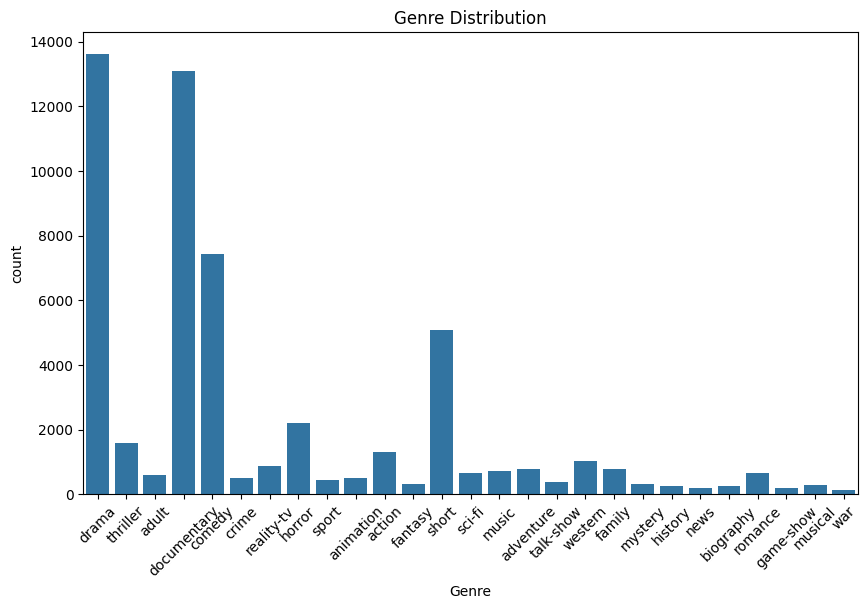

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization with rotated x-axis labels
plt.figure(figsize=(10, 6))
sns.countplot(x="Genre", data=df_train)
plt.title("Genre Distribution")
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()



In [69]:

print("Train Data Shape:", df_train.shape)
print("Test Data Shape:", df_test.shape)


Train Data Shape: (54214, 4)
Test Data Shape: (54200, 3)


In [70]:
print(df_train.describe())

           ID                         Title  Genre  \
count   54214                         54214  54214   
unique  54214                         54214     27   
top         1  Oscar et la dame rose (2009)  drama   
freq        1                             1  13613   

                                              Description  
count                                               54214  
unique                                              54086  
top     Grammy - music award of the American academy o...  
freq                                                   12  


In [71]:
print(df_test.describe())

           ID                 Title  \
count   54200                 54200   
unique  54200                 54200   
top         1  Edgar's Lunch (1998)   
freq        1                     1   

                                              Description  
count                                               54200  
unique                                              54072  
top     Grammy - music award of the American academy o...  
freq                                                   10  


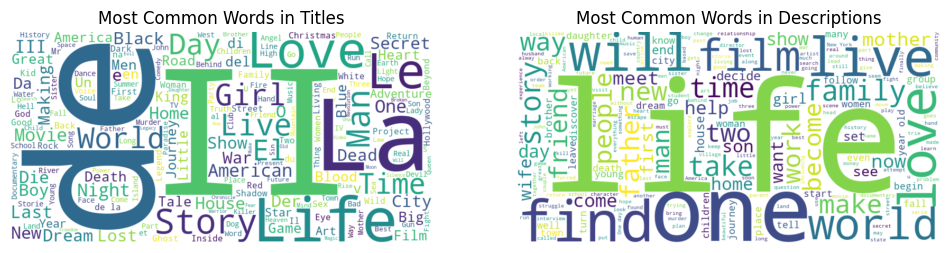

In [72]:
from wordcloud import WordCloud

# Join all titles and descriptions into single strings
all_titles = ' '.join(df_train['Title'])
all_descriptions = ' '.join(df_train['Description'])

# Generate word clouds for titles and descriptions
title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)
description_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)

# Plot word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.title('Most Common Words in Titles')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(description_wordcloud, interpolation='bilinear')
plt.title('Most Common Words in Descriptions')
plt.axis('off')

plt.show()


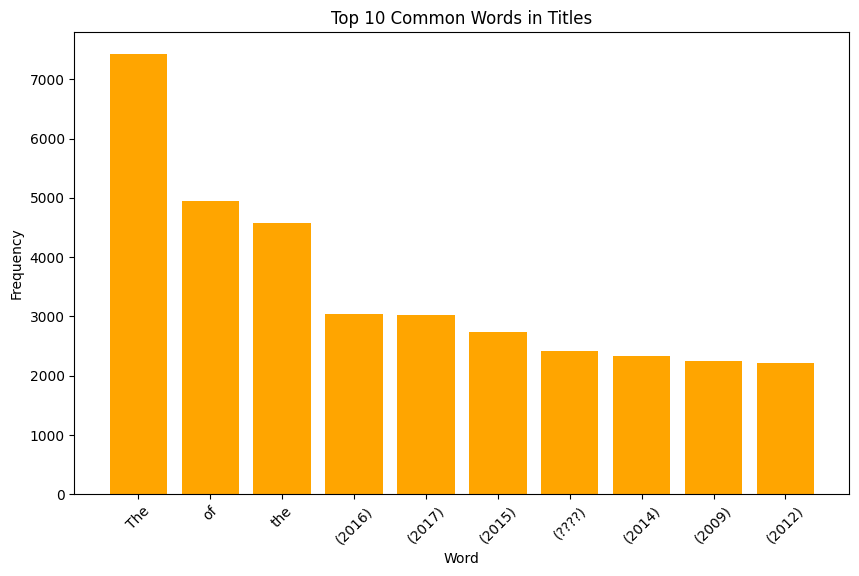

In [73]:
from collections import Counter
N = 10  # Top N words to display
title_words = ' '.join(df_train['Title']).split()
title_word_counts = Counter(title_words)
top_title_words = title_word_counts.most_common(N)
plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in top_title_words], [count[1] for count in top_title_words], color='orange')
plt.title('Top {} Common Words in Titles'.format(N))
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

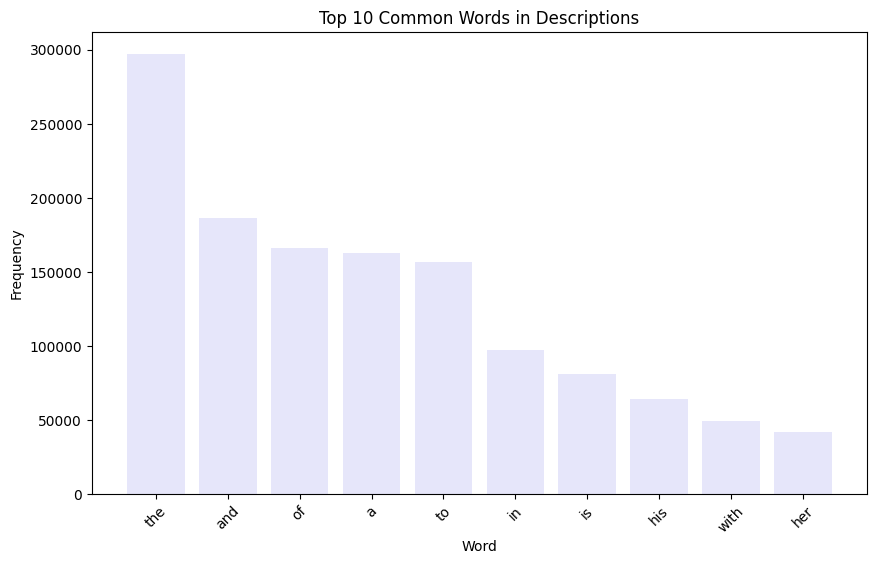

In [74]:
description_words = ' '.join(df_train['Description']).split()
description_word_counts = Counter(description_words)
top_description_words = description_word_counts.most_common(N)
plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in top_description_words], [count[1] for count in top_description_words], color='lavender')
plt.title('Top {} Common Words in Descriptions'.format(N))
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split

train_data, validation_data = train_test_split(df_train, test_size=0.2, random_state=42)

# Optional: Display the first few rows of each split to verify
print("Train Data Sample:")
print(train_data.head())
print("\nValidation Data Sample:")
print(validation_data.head())

Train Data Sample:
          ID                                              Title        Genre  \
19253  19254                                     "Shade" (????)        drama   
12261  12262                                   Scarecrow (2016)        drama   
37143  37144  Larry Wilmore's Race, Religion & Sex in Florid...  documentary   
21965  21966                               Dear Mr. Gore (2009)  documentary   
7033    7034                               "Reinikainen" (1982)       comedy   

                                             Description  
19253  Sex. Betrayal. Seduction. Manipulation. Addict...  
12261  Autistic teen, Tony and his friendship with Ca...  
37143  The one-hour special examines this socially, e...  
21965  This personal narrative documentary uses my bi...  
7033   The easy-going village policeman Artturi Sakar...  

Validation Data Sample:
          ID                                   Title   Genre  \
5089    5090                       Sisterhood (2008)  com

In [76]:
print(df_train.columns,df_test.columns)

Index(['ID', 'Title', 'Genre', 'Description'], dtype='object') Index(['ID', 'Title', 'Description'], dtype='object')


In [77]:
print(train_data.columns)

Index(['ID', 'Title', 'Genre', 'Description'], dtype='object')


In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Assuming 'Title' and 'Description' are the text columns we want to vectorize
# Initialize the TfidfVectorizer for both 'Title' and 'Description'
title_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
description_vectorizer = TfidfVectorizer(max_features=10000) # Adjust max_features as needed
genre_vectorizer = TfidfVectorizer(max_features=10000)

# Fit the vectorizer on the training data and transform the training data
title_train_tfidf = title_vectorizer.fit_transform(train_data['Title'])
description_train_tfidf = description_vectorizer.fit_transform(train_data['Description'])
genre_train_tfidf = genre_vectorizer.fit_transform(train_data['Genre'])

# Transform the validation data using the same vectorizer
title_validation_tfidf = title_vectorizer.transform(validation_data['Title'])
description_validation_tfidf = description_vectorizer.transform(validation_data['Description'])
genre_validation_tfidf = genre_vectorizer.transform(validation_data['Genre'])

# Combine the title and description TF-IDF features into one set for training
train_tfidf = hstack([title_train_tfidf, description_train_tfidf])

# Combine the title and description TF-IDF features into one set for validation
validation_tfidf = hstack([title_validation_tfidf, description_validation_tfidf])

In [79]:
import numpy as np

# Convert genre_validation_dense to single-column format
y_true_single_column = np.argmax(genre_validation_dense, axis=1)

# Calculate the accuracy score
accuracy = accuracy_score(y_true_single_column, y_pred_nb)
print('Naive Bayes Accuracy:', accuracy)


Naive Bayes Accuracy: 0.024070829106335886


In [80]:
from sklearn.svm import LinearSVC

svm_classifier = LinearSVC(max_iter=1000)
svm_classifier.fit(train_tfidf, train_data['Genre'])

# Predict and evaluate the model
y_pred_svm = svm_classifier.predict(validation_tfidf)
print('SVM Accuracy:', accuracy_score(validation_data['Genre'], y_pred_svm))


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVM Accuracy: 0.5705063174398229


In [81]:
y_pred_svm

array(['comedy', 'drama', 'comedy', ..., 'drama', 'short', 'documentary'],
      dtype=object)

In [83]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=1000)
logreg_classifier.fit(train_tfidf, train_data['Genre'])

# Predict and evaluate the model
y_pred_logreg = logreg_classifier.predict(validation_tfidf)
print('Logistic Regression Accuracy:', accuracy_score(validation_data['Genre'], y_pred_logreg))

Logistic Regression Accuracy: 0.5967905561191552


In [84]:
y_pred_logreg

array(['comedy', 'drama', 'comedy', ..., 'drama', 'short', 'horror'],
      dtype=object)